# 03 – GNN Results

This notebook summarizes the results of the GNN-based link prediction model trained on the collaboration network.

It will:

1. Load the saved test metrics from `results/linkpred_metrics.json`.
2. Load the training history from `results/training_history.json`.
3. Inspect the evolution of loss, validation AUC and validation AP.
4. Produce basic plots that complement the figures included in the paper.

In [8]:
import os
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

base_dir = Path("..")
results_dir = base_dir / "results"

metrics_path = results_dir / "linkpred_metrics.json"
history_path = results_dir / "training_history.json"

print("Base dir:", base_dir.resolve())
print("Results dir:", results_dir.resolve())
print("Metrics path:", metrics_path)
print("History path:", history_path)

Base dir: /workspace
Results dir: /workspace/results
Metrics path: ../results/linkpred_metrics.json
History path: ../results/training_history.json


## 1. Load final test metrics

These are the metrics saved by `gnn/train_link_prediction_gnn.py` after training with the best validation checkpoint.

In [9]:
if not metrics_path.exists():
    raise FileNotFoundError(f"Metrics file not found: {metrics_path}")

with open(metrics_path, "r") as f:
    metrics = json.load(f)

metrics_df = pd.DataFrame([metrics])
metrics_df

,test_auc,test_ap,encoder,epochs
0,0.812171,0.828453,gcn,100


You can access the individual values as follows:

In [10]:
test_auc = metrics.get("test_auc")
test_ap = metrics.get("test_ap")
encoder_name = metrics.get("encoder")
epochs = metrics.get("epochs")

print(f"Encoder: {encoder_name}")
print(f"Epochs:  {epochs}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test AP:  {test_ap:.4f}")

Encoder: gcn
Epochs:  100
Test AUC: 0.8122
Test AP:  0.8285


## 2. Load and inspect training history

The training script stores, for each epoch:

- `train_loss`
- `val_auc`
- `val_ap`

In [11]:
if not history_path.exists():
    raise FileNotFoundError(f"History file not found: {history_path}")

with open(history_path, "r") as f:
    history = json.load(f)

history_df = pd.DataFrame(history)
history_df.head()

,epoch,train_loss,val_auc,val_ap
0,1,0.693744,0.694766,0.748569
1,2,0.691058,0.716165,0.764064
2,3,0.688596,0.723648,0.768943
3,4,0.686189,0.727131,0.771047
4,5,0.683480,0.729233,0.772058


Show the last epochs to confirm convergence:

In [12]:
history_df.tail(10)

,epoch,train_loss,val_auc,val_ap
90,91,0.482864,0.804954,0.824593
91,92,0.484719,0.805284,0.824704
92,93,0.481198,0.805636,0.824872
93,94,0.482293,0.806094,0.825219
94,95,0.478639,0.806626,0.825665
95,96,0.478335,0.807154,0.826066
96,97,0.477815,0.807682,0.826398
97,98,0.475895,0.808269,0.826808
98,99,0.472863,0.808946,0.827327
99,100,0.474272,0.809682,0.827897


## 3. Plot training curves

These plots are conceptually aligned with the figure used in the paper (training loss, validation AUC and validation AP per epoch).

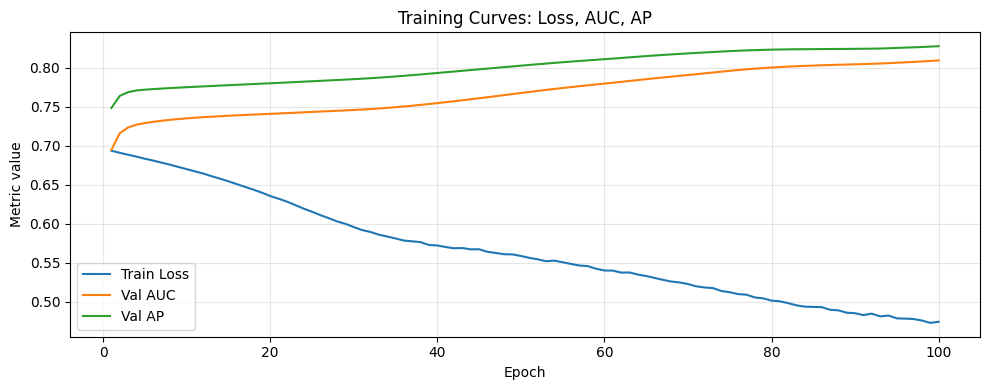

In [13]:
plt.figure(figsize=(10, 4))

plt.plot(history_df["epoch"], history_df["train_loss"], label="Train Loss")
plt.plot(history_df["epoch"], history_df["val_auc"], label="Val AUC")
plt.plot(history_df["epoch"], history_df["val_ap"], label="Val AP")

plt.xlabel("Epoch")
plt.ylabel("Metric value")
plt.title("Training Curves: Loss, AUC, AP")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

If you want to export this figure to a PNG file compatible with the paper (e.g., `fig_training_curves.png`), you can run the following cell.

Saved figure to: ../fig_training_curves_from_notebook.png


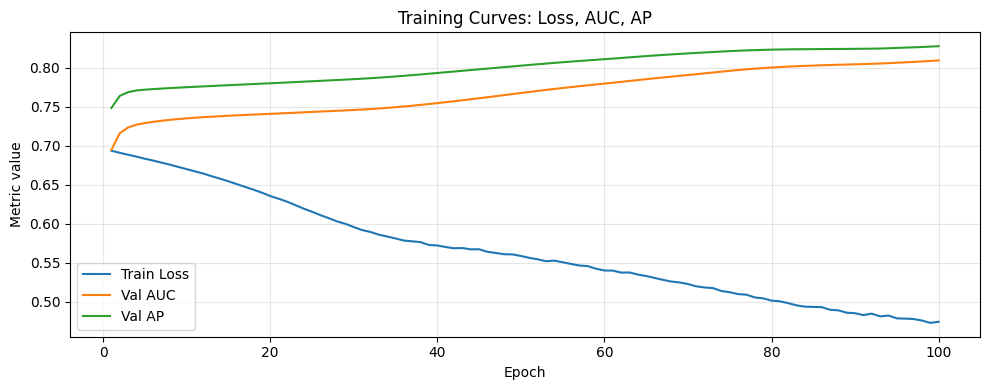

In [14]:
out_path = base_dir / "fig_training_curves_from_notebook.png"

plt.figure(figsize=(10, 4))
plt.plot(history_df["epoch"], history_df["train_loss"], label="Train Loss")
plt.plot(history_df["epoch"], history_df["val_auc"], label="Val AUC")
plt.plot(history_df["epoch"], history_df["val_ap"], label="Val AP")

plt.xlabel("Epoch")
plt.ylabel("Metric value")
plt.title("Training Curves: Loss, AUC, AP")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(out_path, dpi=300)

print(f"Saved figure to: {out_path}")

## 4. Summary

In this notebook we:

- Loaded the final test metrics (AUC and AP) achieved by the GNN-based link prediction model.
- Inspected the full training history and verified that the validation metrics converged.
- Plotted the training curves that support the analysis in the Results/Discussion sections of the paper.

These elements can now be referenced in the manuscript and reused for additional analysis if needed.

In [15]:
print('Notebook 03 finished successfully. 🚀')

Notebook 03 finished successfully. 🚀
